In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob as tb
import seaborn as sns

* Load the data 

In [2]:
try:
    df = pd.read_csv("../src/data/raw_analyst_ratings.csv")
except FileNotFoundError:
    print("File not found. Please ensure the file path is correct.")
except Exception :
    print("An unexpected error occurred: ", Exception)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [4]:
# drop high values columns
df.drop(columns=["Unnamed: 0"], inplace=True)

* Publisher analysis

In [5]:
df["publisher"].describe()

count           1407328
unique             1034
top       Paul Quintaro
freq             228373
Name: publisher, dtype: object

In [6]:
publisher_counts = df["publisher"].value_counts().sort_values(ascending=False)
publisher_counts.head()

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Name: count, dtype: int64

C:\Users\Sintayehu-PC\AppData\Local\Temp\ipykernel_25100\3886889074.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=publisher_counts.head(7).index, y=publisher_counts.head(7).values, palette='viridis')


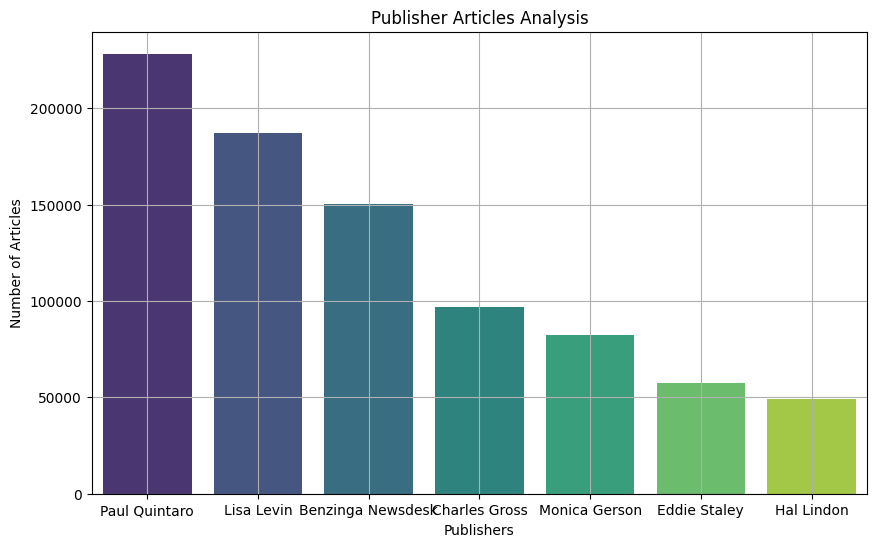

In [7]:
# Plot publishing times
plt.figure(figsize=(10, 6))
sns.barplot(x=publisher_counts.head(7).index, y=publisher_counts.head(7).values, palette='viridis')
plt.title('Publisher Articles Analysis')
plt.xlabel('Publishers')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

* Headline and Sentment Analysis

In [8]:
df["headline"].head()

0              Stocks That Hit 52-Week Highs On Friday
1           Stocks That Hit 52-Week Highs On Wednesday
2                        71 Biggest Movers From Friday
3         46 Stocks Moving In Friday's Mid-Day Session
4    B of A Securities Maintains Neutral on Agilent...
Name: headline, dtype: object

In [9]:
df["headline"].describe()

count                     1407328
unique                     845770
top       Benzinga's Top Upgrades
freq                         5449
Name: headline, dtype: object

* Time series analysis

In [10]:
df["date"] = pd.to_datetime(df["date"]  , format='ISO8601')

In [11]:
df["days_of_week"] = df["date"].dt.day_name()
df["days_of_week"].value_counts()

days_of_week
Thursday     302595
Wednesday    300940
Tuesday      296470
Monday       265164
Friday       217892
Sunday        16514
Saturday       7753
Name: count, dtype: int64

Text(0.5, 0, 'Days of Week')

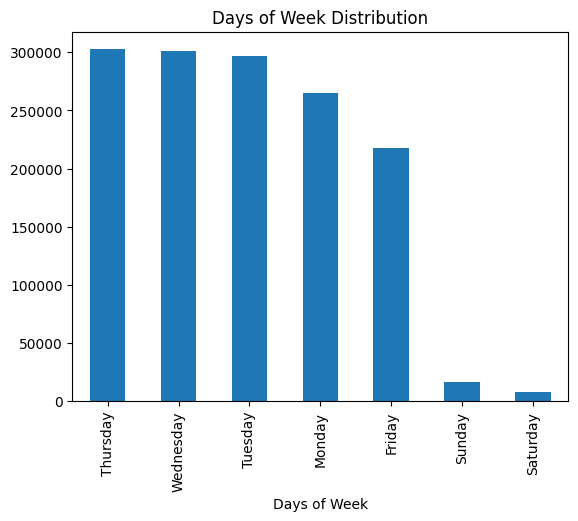

In [12]:
df["days_of_week"].value_counts().plot(kind="bar", title="Days of Week Distribution")
plt.xlabel("Days of Week")

In [13]:
df["publication_hour"] = df["date"].dt.hour

* Publication times

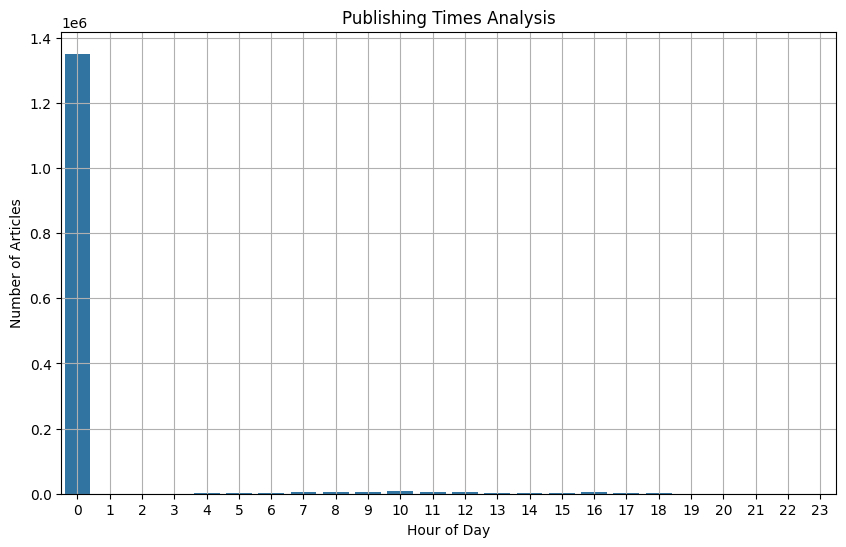

In [14]:
hourly_counts = df["publication_hour"].value_counts().sort_index()

# Plot publishing times
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values)
plt.title('Publishing Times Analysis')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Articles')
#plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

In [15]:
hourly_counts

publication_hour
0     1351408
1          14
2          57
3          93
4        1469
5        1829
6        2476
7        5033
8        5527
9        5965
10       7669
11       5701
12       5732
13       2710
14       2075
15       1612
16       3939
17       2800
18        704
19        227
20        131
21         82
22         48
23         27
Name: count, dtype: int64

In [16]:
df.head()

,headline,url,publisher,date,stock,days_of_week,publication_hour
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,Friday,10
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,Wednesday,10
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,Tuesday,4
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,Friday,12
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,Friday,11


In [18]:
def get_sentiment(text):
    analysis = tb(text)
    return analysis.sentiment.polarity

* Sentiment Analysis

In [19]:
df["sentiment_score"] = df["headline"].apply(get_sentiment)
df['sentiment_score_word'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0 else ('neutral' if x == 0 else 'negative'))

In [20]:
df.head()

,headline,url,publisher,date,stock,days_of_week,publication_hour,sentiment_score,sentiment_score_word
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,Friday,10,0.0,neutral
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,Wednesday,10,0.0,neutral
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,Tuesday,4,0.0,neutral
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,Friday,12,0.0,neutral
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,Friday,11,0.0,neutral


<Axes: title={'center': 'Sentiment Score Distribution'}, xlabel='sentiment_score_word'>

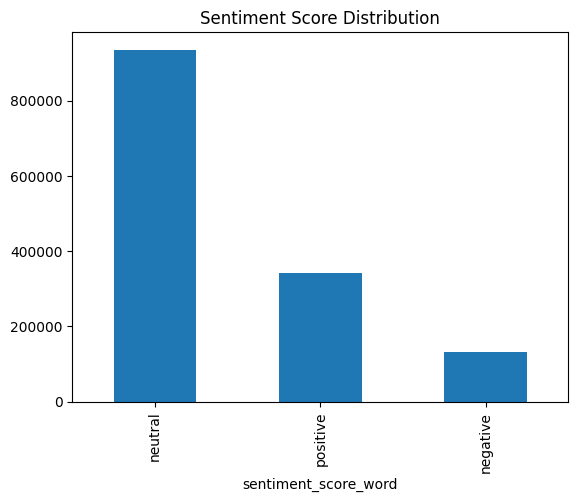

In [21]:
df["sentiment_score_word"].value_counts().plot(kind="bar", title="Sentiment Score Distribution")

* The Sentiment label new publication of two top publisher

<Axes: title={'center': 'Sentiment Score Distribution for Paul Quintaro'}, xlabel='sentiment_score_word'>

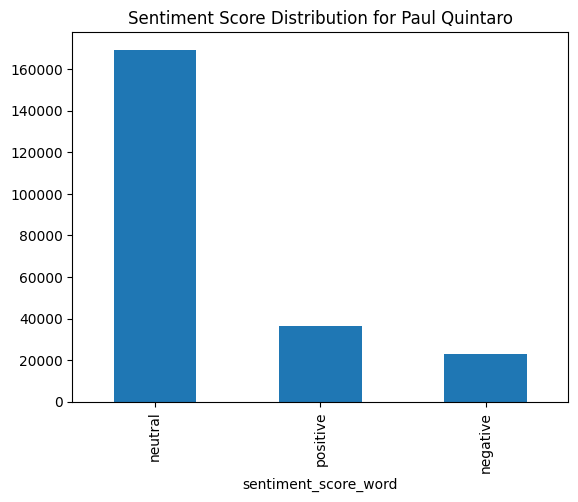

In [22]:
df[df["publisher"] == "Paul Quintaro"]["sentiment_score_word"].value_counts().plot(kind="bar", title="Sentiment Score Distribution for Paul Quintaro")

<Axes: title={'center': 'Sentiment Score Distribution for Lisa Levin'}, xlabel='sentiment_score_word'>

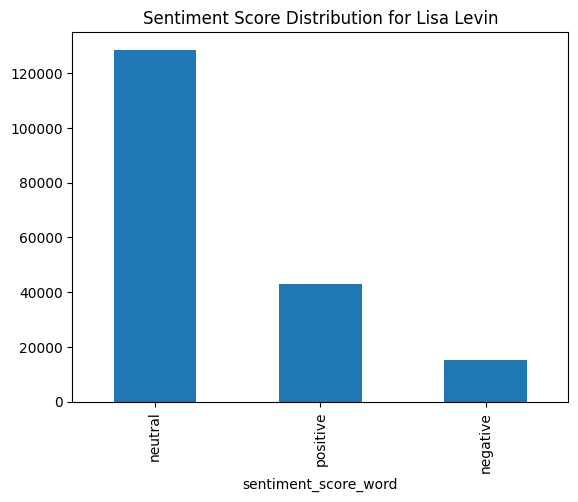

In [23]:
df[df["publisher"] == "Lisa Levin"]["sentiment_score_word"].value_counts().plot(kind="bar", title="Sentiment Score Distribution for Lisa Levin")

* Using dmail domain identifying Company organizations contribution 

In [24]:
df["domain"] = df["publisher"].apply(lambda x: x.split("@")[-1] if "@" in x else "None")

<Axes: title={'center': 'Company Publication Distribution'}, xlabel='domain'>

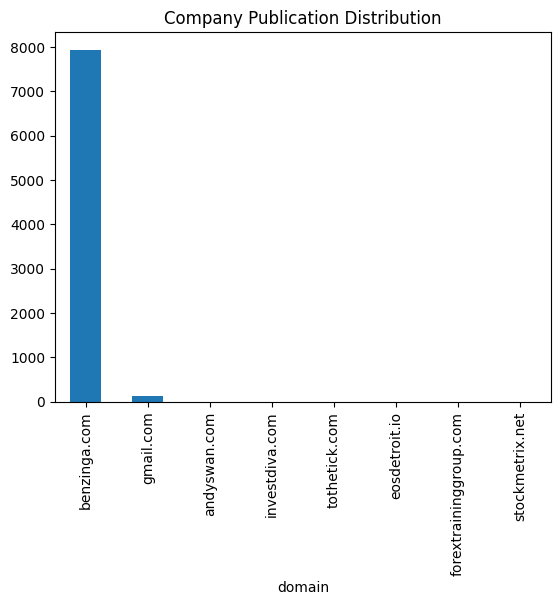

In [25]:
df[df["domain"] != "None"]["domain"].value_counts().plot(kind="bar", title="Company Publication Distribution")

* News headline analysis

In [37]:
df["headline"].describe()

count                     1407328
unique                     845770
top       Benzinga's Top Upgrades
freq                         5449
Name: headline, dtype: object

In [ ]:
# Extracting headline length of each as standalone column
df["headline_length"] = df["headline"].apply(lambda x: len(x))

In [38]:
df["headline_length"].describe()

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

* Visualizing publication trend over time 

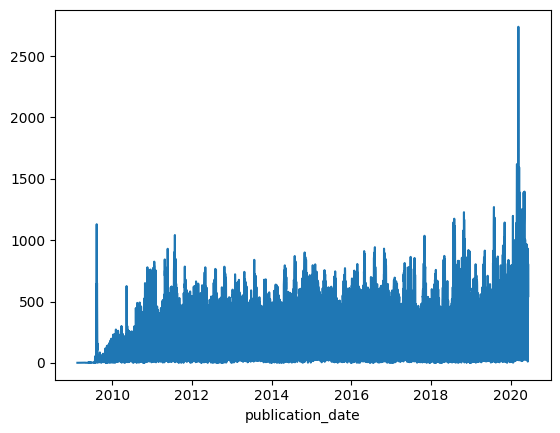

In [27]:
df['publication_date'] = df['date'].dt.date
daily_count = df.groupby('publication_date').size().plot()

In [28]:
df.head()

,headline,url,publisher,date,stock,days_of_week,publication_hour,sentiment_score,sentiment_score_word,domain,headline_length,publication_date
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,Friday,10,0.0,neutral,None,39,2020-06-05
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,Wednesday,10,0.0,neutral,None,42,2020-06-03
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,Tuesday,4,0.0,neutral,None,29,2020-05-26
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,Friday,12,0.0,neutral,None,44,2020-05-22
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,Friday,11,0.0,neutral,None,87,2020-05-22


* Topic Modeling

In [29]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Download NLTK resources (only once)
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')


text_data = df["headline"].fillna("").astype(str)  # Replace with your column name

# Define stopwords and punctuation
stop_words = set(stopwords.words('english'))
punct = set(string.punctuation)

# Define topic rules as keyword sets
topic_keywords = {
    "FDA Approval": ["fda", "approval", "approved"],
    "Price Target": ["price", "target", "pt", "raises", "cuts"],
    "Earnings Report": ["earnings", "eps", "revenue", "quarter", "results"],
    "Stock Movement": ["stock", "jumps", "drops", "soars", "plunges", "rises", "falls"],
    "Mergers & Acquisitions": ["merger", "acquisition", "acquire", "buyout"],
    "Product Launch": ["launch", "unveil", "introduce", "product", "new"],
    "Legal or Regulatory": ["lawsuit", "fine", "investigation", "regulatory", "settlement"]
}

# Function to assign topic based on keywords
def assign_topic(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word not in stop_words and word not in punct]
    for topic, keywords in topic_keywords.items():
        if any(keyword in tokens for keyword in keywords):
            return topic
    return "Other"



[nltk_data] Downloading package punkt to C:\Users\Sintayehu-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Sintayehu-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Sintayehu-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
# Apply topic assignment
df["topic"] = text_data.apply(assign_topic)




In [31]:
df["topic"].value_counts()

topic
Other                     887453
Earnings Report           229928
Price Target              160434
Product Launch             46772
Stock Movement             41519
Mergers & Acquisitions     20107
FDA Approval               16186
Legal or Regulatory         4929
Name: count, dtype: int64

* Visualizing top topics news publication frequence

<Axes: title={'center': 'News Publication Topic Distribution except Other'}, xlabel='topic'>

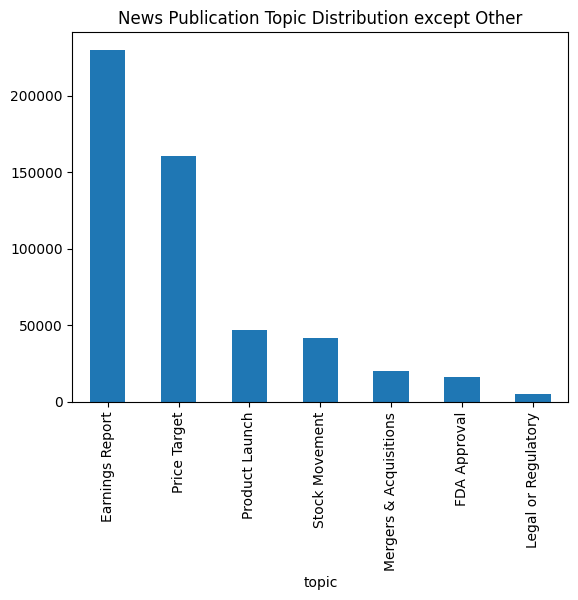

In [32]:
df[df["topic"] != "Other"]["topic"].value_counts().plot(kind="bar", title="News Publication Topic Distribution except Other")

* Save the type of news top two publisher report

<Axes: title={'center': 'News Topic Distribution for Paul Quintaro'}, xlabel='topic'>

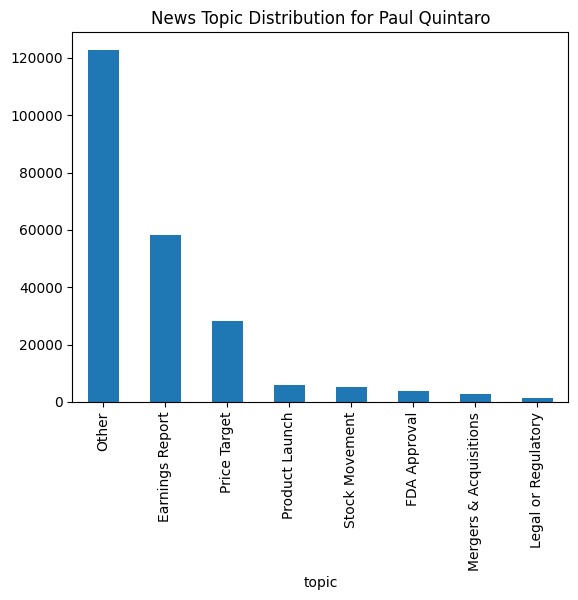

In [33]:
df[df["publisher"] == "Paul Quintaro"]["topic"].value_counts().plot(kind="bar", title="News Topic Distribution for Paul Quintaro")

<Axes: title={'center': 'News Topic Distribution for Lisa Levin'}, xlabel='topic'>

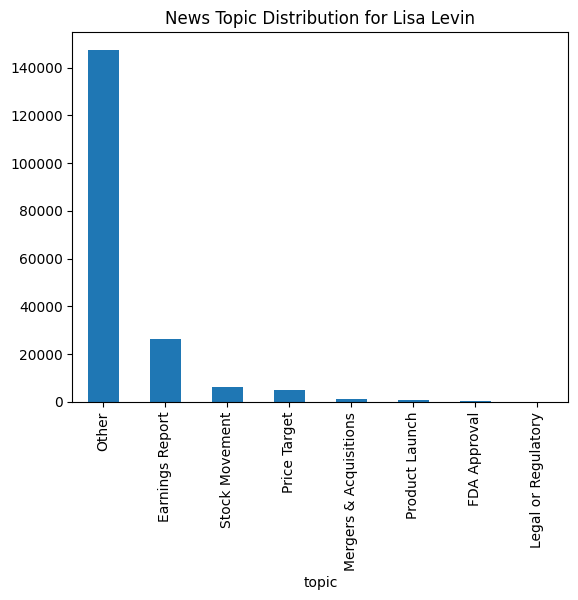

In [34]:
df[df["publisher"] == "Lisa Levin"]["topic"].value_counts().plot(kind="bar", title="News Topic Distribution for Lisa Levin")

In [35]:
df.to_csv("../src/data/processed/news_data.csv", index=False)

In [36]:
df.head(10)

,headline,url,publisher,date,stock,days_of_week,publication_hour,sentiment_score,sentiment_score_word,domain,headline_length,publication_date,topic
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,Friday,10,0.00,neutral,None,39,2020-06-05,Other
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,Wednesday,10,0.00,neutral,None,42,2020-06-03,Other
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,Tuesday,4,0.00,neutral,None,29,2020-05-26,Other
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,Friday,12,0.00,neutral,None,44,2020-05-22,Other
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,Friday,11,0.00,neutral,None,87,2020-05-22,Price Target
5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 11:23:25-04:00,A,Friday,11,0.00,neutral,benzinga.com,71,2020-05-22,Price Target
6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 09:36:20-04:00,A,Friday,9,0.00,neutral,benzinga.com,73,2020-05-22,Price Target
7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 09:07:04-04:00,A,Friday,9,0.25,positive,None,120,2020-05-22,Earnings Report
8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 08:37:59-04:00,A,Friday,8,0.00,neutral,benzinga.com,84,2020-05-22,Price Target
9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 08:06:17-04:00,A,Friday,8,0.00,neutral,None,42,2020-05-22,Price Target
